In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
font={'family':'SimHei','size':'20'}
plt.rc('font',**font)

In [7]:
df=pd.read_csv('data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# 数据是否有空值
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# 查看数据描述
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# 把列改成中文
df.columns=['用户ID','性别','年龄','年收入','支出']
df.head()

,用户ID,性别,年龄,年收入,支出
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 查看数据分布

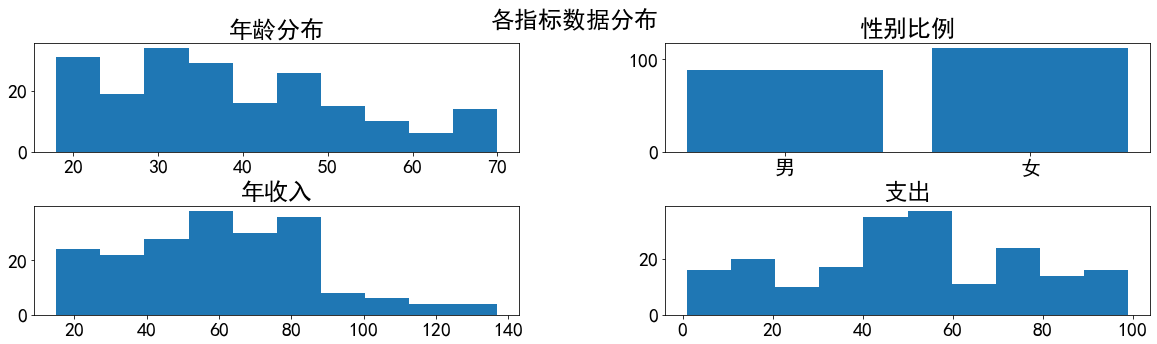

In [16]:
fig=plt.figure(figsize=(20,5))
fig.suptitle('各指标数据分布')
# 画第一个图
ax1=fig.add_subplot(221)
# 年龄分布
ax1.hist(df['年龄'])
ax1.title.set_text('年龄分布')
# 查看性别比例
ax2=fig.add_subplot(222)
height=[(df['性别']=='Male').sum(),(df['性别']=='Female').sum()]
ax2.bar(['男','女'],height=height)
ax2.title.set_text('性别比例')
# 查看年收入
ax3=fig.add_subplot(223)
ax3.hist(df['年收入'])
ax3.title.set_text('年收入')
# 查看支出
ax4=fig.add_subplot(224)
ax4.hist(df['支出'])
ax4.title.set_text('支出')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show()

## 年龄与年收入的关系

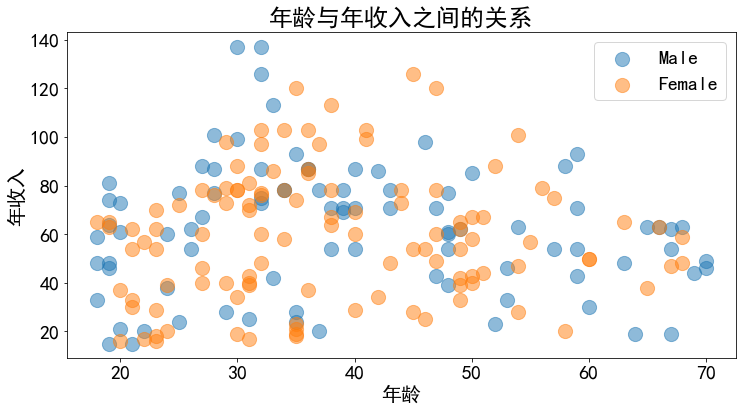

In [17]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年龄',y='年收入',
                data=df[df['性别']==gender],
                s=200,alpha=0.5,label=gender)
plt.xlabel('年龄')
plt.ylabel('年收入')
plt.title('年龄与年收入之间的关系')
plt.legend()
plt.show()

## 年龄与支出之间的关系

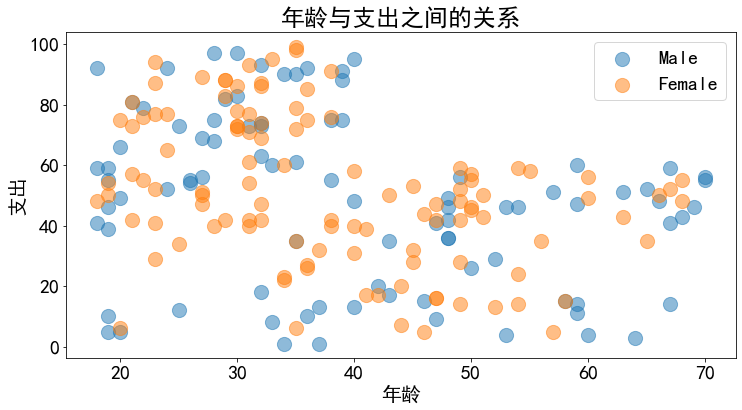

In [19]:
plt.figure(1,figsize=(12,6))
for gender in['Male','Female']:
    plt.scatter(x='年龄',y='支出',
               data=df[df['性别']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('年龄')
plt.ylabel('支出')
plt.title('年龄与支出之间的关系')
plt.legend()
plt.show()

## 年收入与指出之间的关系

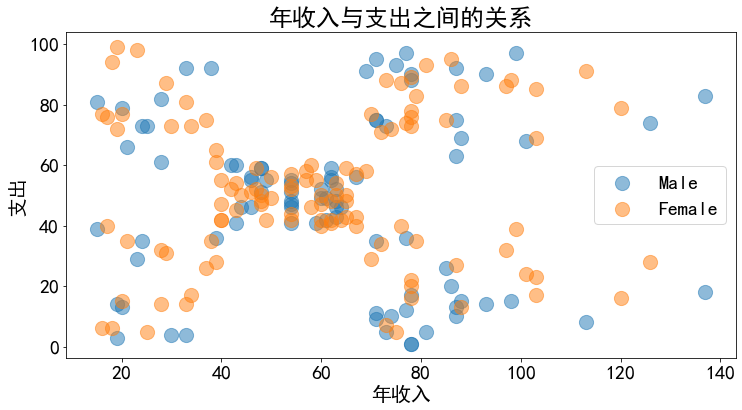

In [20]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年收入',y='支出',
               data=df[df['性别']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('年收入')
plt.ylabel('支出')
plt.title('年收入与支出之间的关系')
plt.legend()
plt.show()

## 使用Kmeans聚类进行分析

Z:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


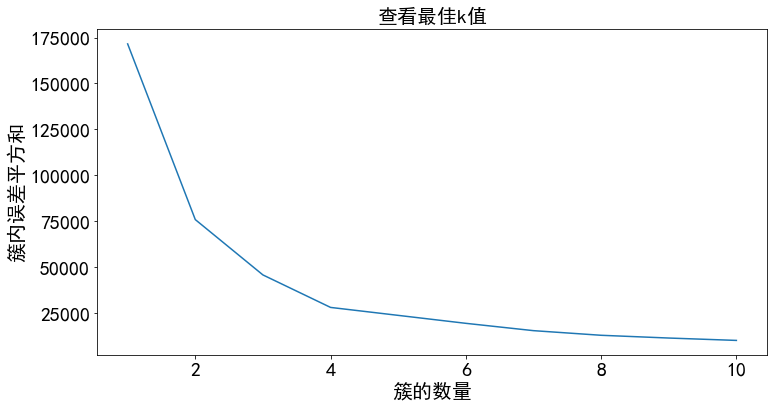

In [21]:
## 寻找最佳k值
x1=df[['年龄','支出']].values
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x1)
    inertia.append(km.inertia_)#簇内误差平方和
plt.figure(1,figsize=(12,6))
plt.plot(range(1,11),inertia)
plt.title('查看最佳k值',fontsize=20)
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

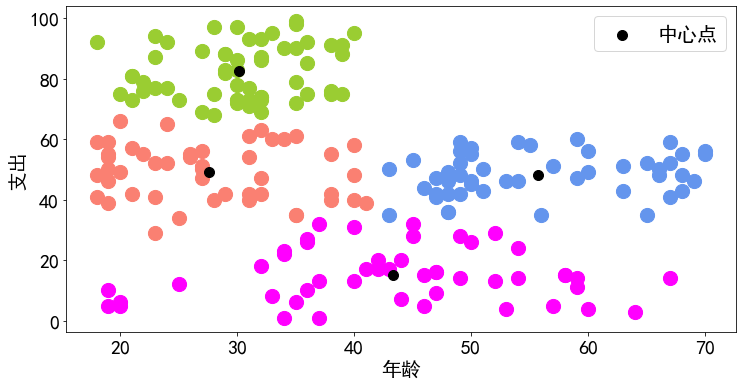

In [23]:
## 经过上图观察，我们把k值取为4
km=KMeans(n_clusters=4)
y_means=km.fit_predict(x1)
plt.figure(1,figsize=(12,6))
plt.scatter(x1[y_means==0,0],x1[y_means==0,1],s=200,c='salmon')
plt.scatter(x1[y_means==1,0],x1[y_means==1,1],s=200,c='yellowgreen')
plt.scatter(x1[y_means==2,0],x1[y_means==2,1],s=200,c='cornflowerblue')
plt.scatter(x1[y_means==3,0],x1[y_means==3,1],s=200,c='magenta')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='中心点')
plt.xlabel('年龄')
plt.ylabel('支出')
plt.legend()
plt.show()

## 根据年收入和支出进行分析

Z:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


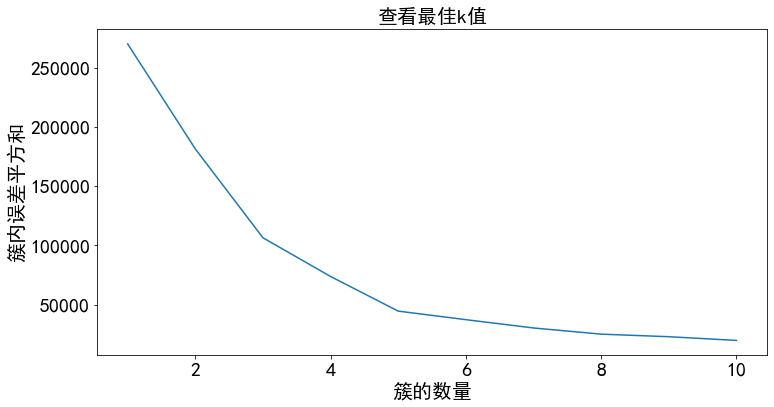

In [24]:
x2=df[['年收入','支出']].values
inertia=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x2)
    inertia.append(km.inertia_)#簇内误差平方和
plt.figure(1,figsize=(12,6))
plt.plot(range(1,11),inertia)
plt.title('查看最佳k值',fontsize=20)
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

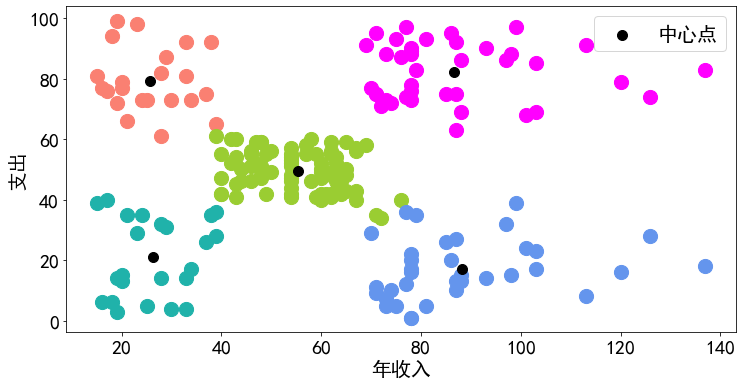

In [25]:
## 经过上图观察，我们把k值取为4
km=KMeans(n_clusters=5)
y_means=km.fit_predict(x2)
plt.figure(1,figsize=(12,6))
plt.scatter(x2[y_means==0,0],x2[y_means==0,1],s=200,c='salmon')
plt.scatter(x2[y_means==1,0],x2[y_means==1,1],s=200,c='yellowgreen')
plt.scatter(x2[y_means==2,0],x2[y_means==2,1],s=200,c='cornflowerblue')
plt.scatter(x2[y_means==3,0],x2[y_means==3,1],s=200,c='magenta')
plt.scatter(x2[y_means==4,0],x2[y_means==4,1],s=200,c='LightSeaGreen')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='中心点')
plt.xlabel('年收入')
plt.ylabel('支出')
plt.legend()
plt.show()